# 02 - Numpy, Pandas y Xarray

### Introducción
En este capítulo aprenderás a utilizar las principales bibliotecas para el manejo y análisis de datos científicos en Python. Empezaremos con NumPy (arreglos eficientes y operaciones vectorizadas), pasaremos a Pandas (análisis tabular de datos), y llegaremos hasta Xarray (análisis y operación sobre arreglos etiquetados multidimensionales, ampliamente usado en meteorología y clima).

NumPy es la base del ecosistema científico de Python. Permite crear y operar con arreglos (arrays) multidimensionales de manera eficiente y concisa. Sus funciones matemáticas, estadísticas y de álgebra lineal son la base de la computación numérica moderna en Python.

**¿En qué consiste?**
NumPy es la base para el cálculo numérico en Python. Proporciona arrays o matrices multidimensionales homogéneas (todos sus elementos son del mismo tipo, usualmente números), junto a funciones rápidas para operaciones matemáticas, estadísticas y álgebra lineal. Está implementado en C para máximo rendimiento.

**Ventajas:**

Velocidad y eficiencia en operaciones numéricas con grandes volúmenes de datos.

Funcionalidades avanzadas para álgebra lineal, transformadas y generación de números aleatorios.

Base sobre la que construyen Pandas y Xarray.

Ideal para cálculos científicos, modelamiento y simulaciones numéricas.

**Limitaciones:**

Maneja arrays homogéneos sin etiquetas ni estructura tabular; no es intuitivo para datos heterogéneos o con dimensiones nombradas.

### NumPy: Manejo de datos numéricos para variables atmosféricas

In [4]:
import numpy as np

# Simulamos temperaturas en grados Celsius en 5 bases aéreas de la FAC
temps_c = np.array([23.4, 24.5, 22.8, 25.1, 23.9])
print("Temperaturas (°C) bases FAC:", temps_c)

# Convertimos a Kelvin para cálculos físicos (K = °C + 273.15)
temps_k = temps_c + 273.15
print("Temperaturas (K):", temps_k)

# Creamos un arreglo 2D de viento (u,v) en diferentes alturas (1000m y 2000m)
viento = np.array([[5.0, 2.0],  # u, v a 1000 m
                   [6.5, 3.1]]) # u, v a 2000 m
print("Componente del viento u,v m/s:\n", viento)

# Magnitud del viento (vector velocidad)
magnitud = np.sqrt(viento[:,0]**2 + viento[:,1]**2)
print("Magnitud del viento (m/s):", magnitud)


Temperaturas (°C) bases FAC: [23.4 24.5 22.8 25.1 23.9]
Temperaturas (K): [296.55 297.65 295.95 298.25 297.05]
Componente del viento u,v m/s:
 [[5.  2. ]
 [6.5 3.1]]
Magnitud del viento (m/s): [5.38516481 7.20138875]


### Pandas: Manejo de datos de estaciones meteorológicas FAC

**¿En qué consiste?**
Pandas extiende a NumPy, enfocándose en datos tabulares y series temporales. Introduce DataFrame (tablas bidimensionales con columnas heterogéneas) y Series (cadenas unidimensionales etiquetadas).

**Ventajas:**

Manipulación y análisis fácil y potente de datos tabulares, con múltiples herramientas para limpieza, filtrado, agrupamiento, pivot y agregación.

Manejo eficiente de fechas y series temporales, importantísimo en meteorología para datos de estaciones o reportes.

Compatible con datos heterogéneos y operaciones que involucran distintos tipos.

Integra bien con visualización.

**Limitaciones:**

Está limitado a estructuras 1D o 2D (series y tablas); no maneja fácilmente datos con mayor número de dimensiones.

In [6]:
import pandas as pd

# Creando un DataFrame simulando reportes diarios de temperatura y viento en tres bases FAC
datos = {
    "estacion": ["Base A", "Base B", "Base C"],
    "temperatura_C": [23.4, 24.6, 22.9],
    "vel_viento": [5.5, 3.2, 4.8],
    "fecha": pd.to_datetime(["2025-11-1", "2025-11-1", "2025-11-1"])
}
df = pd.DataFrame(datos)

print("Datos meteorológicos FAC:")
print(df)

# Filtrar bases con viento más fuerte que 4 m/s
bases_viento_fuerte = df[df["vel_viento"] > 4]
print("Bases con viento superior a 4m/s:\n", bases_viento_fuerte)

# Agregar columna indicando rango térmico (frío/cálido)
df["rango_termico"] = pd.cut(df["temperatura_C"], bins=[0, 20, 30], labels=["Frio", "Calido"])
print("Con rango térmico:")
print(df)


Datos meteorológicos FAC:
  estacion  temperatura_C  vel_viento      fecha
0   Base A           23.4         5.5 2025-11-01
1   Base B           24.6         3.2 2025-11-01
2   Base C           22.9         4.8 2025-11-01
Bases con viento superior a 4m/s:
   estacion  temperatura_C  vel_viento      fecha
0   Base A           23.4         5.5 2025-11-01
2   Base C           22.9         4.8 2025-11-01
Con rango térmico:
  estacion  temperatura_C  vel_viento      fecha rango_termico
0   Base A           23.4         5.5 2025-11-01        Calido
1   Base B           24.6         3.2 2025-11-01        Calido
2   Base C           22.9         4.8 2025-11-01        Calido


In [7]:
df.set_index("fecha")

,estacion,temperatura_C,vel_viento,rango_termico
fecha,,,,
2025-11-01,Base A,23.4,5.5,Calido
2025-11-01,Base B,24.6,3.2,Calido
2025-11-01,Base C,22.9,4.8,Calido


### Xarray
¿En qué consiste?
Xarray está diseñado para datos multidimensionales etiquetados, comúnmente encontrados en ciencia atmosférica y oceánica (p.ej. datos NetCDF de modelos WRF o reanálisis ERA5). Añade etiquetas (nombres de dimensiones, coordenadas y atributos) sobre arreglos similares a NumPy para facilitar operaciones por nombre en lugar de por índice.

**Ventajas:**

Manejo claro y expresivo de datos N-D, con coordinación espacial, temporal y niveles verticales.

Facilita selección, agrupación, re-muestreo y combinaciones usando etiquetas, lo que simplifica el trabajo con datos geocientíficos.

Soporte para carga perezosa y paralelización con Dask para manejar grandes datasets.

Integración y conversión sencilla entre Pandas y NumPy.

Esencial para análisis y visualización de salidas WRF, satélites y reanálisis climáticos.

**Limitaciones:**

Curva de aprendizaje más pronunciada.

Puede ser ligeramente menos eficiente para operaciones elementales específicas que NumPy puro.

In [9]:
import xarray as xr         # Librería para datos multidimensionales etiquetados
import numpy as np          # Librería para cálculo numérico y manejo de arreglos
import pandas as pd         # Librería para manejo de series temporales y tablas

# Creamos un rango de fechas desde el 1 de noviembre de 2025 para 5 días consecutivos.
# Esto será la dimensión temporal de nuestro conjunto de datos.
tiempo = pd.date_range("2025-11-01", periods=5)

# Definimos las dos bases aéreas de la Fuerza Aeroespacial Colombiana donde tenemos mediciones.
bases = ["Base_A", "Base_B"]

# Generamos datos aleatorios simulados de temperaturas en grados Celsius.
# np.random.rand(5, 2) genera una matriz de 5 filas y 2 columnas (5 días, 2 bases)
# con números aleatorios uniformes entre 0 y 1.
# Multiplicamos por 8 para aumentar el rango y sumamos 15 para que estén entre 15 y 23 °C.
data = 15 + 8 * np.random.rand(5, 2)

# Construimos un DataArray de Xarray, que es como un arreglo multidimensional
# pero con etiquetas en dimensiones y coordenadas para facilitar su manipulación.
# Aquí, coords indica los valores de las coordenadas (tiempo y base),
# y dims nos dice cómo se nombran esas dimensiones.
temps = xr.DataArray(data, coords=[tiempo, bases], dims=["time", "base"])

# Imprimimos el DataArray completo para ver los datos simulados y sus etiquetas.
print("Temperaturas simuladas (°C):")
print(temps)

# Seleccionamos el valor específico de temperatura medido en 'Base_A' el día 3 de noviembre.
# La función .sel permite seleccionar valores en función de las etiquetas (coordenadas).
temp_baseA = temps.sel(time="2025-11-03", base="Base_A")
# .values extrae el valor numérico del objeto DataArray para imprimirlo con formato
print(f"Temperatura Base A el 3 de noviembre: {temp_baseA.values:.2f}°C")

# Calculamos la temperatura promedio para cada base en todo el período de 5 días.
# .mean(dim="time") indica que el promedio se hace a lo largo de la dimensión 'time'.
temp_media = temps.mean(dim="time")
print("Temperatura media en cada base (°C):")
print(temp_media)

# Seleccionamos un rango de fechas del 2 al 4 de noviembre, inclusive.
# Esto permite trabajar sólo con un subconjunto temporal del DataArray.
temp_rango = temps.sel(time=slice("2025-11-02", "2025-11-04"))
print("Selección de temperaturas del 2 al 4 nov:")
print(temp_rango)


Temperaturas simuladas (°C):
<xarray.DataArray (time: 5, base: 2)> Size: 80B
array([[20.55448625, 17.35409412],
       [15.6563207 , 22.50887594],
       [15.79368897, 15.50834515],
       [19.60202928, 21.30431417],
       [19.64628285, 15.45054664]])
Coordinates:
  * time     (time) datetime64[ns] 40B 2025-11-01 2025-11-02 ... 2025-11-05
  * base     (base) <U6 48B 'Base_A' 'Base_B'
Temperatura Base A el 3 de noviembre: 15.79°C
Temperatura media en cada base (°C):
<xarray.DataArray (base: 2)> Size: 16B
array([18.25056161, 18.4252352 ])
Coordinates:
  * base     (base) <U6 48B 'Base_A' 'Base_B'
Selección de temperaturas del 2 al 4 nov:
<xarray.DataArray (time: 3, base: 2)> Size: 48B
array([[15.6563207 , 22.50887594],
       [15.79368897, 15.50834515],
       [19.60202928, 21.30431417]])
Coordinates:
  * time     (time) datetime64[ns] 24B 2025-11-02 2025-11-03 2025-11-04
  * base     (base) <U6 48B 'Base_A' 'Base_B'


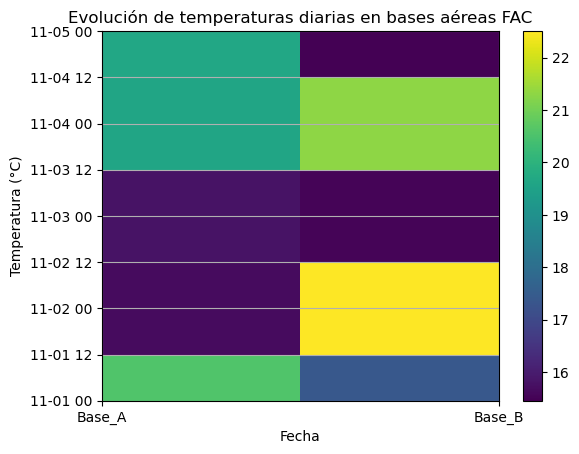

In [10]:
import matplotlib.pyplot as plt  # Librería para gráficos

# Graficar las temperaturas diarias en ambas bases
# El método plot de Xarray llama internamente a Matplotlib y facilita graficar sin complicaciones.
temps.plot()
plt.title("Evolución de temperaturas diarias en bases aéreas FAC")
plt.xlabel("Fecha")
plt.ylabel("Temperatura (°C)")
plt.grid(True)  # Añade una cuadrícula para facilitar lectura
plt.show()


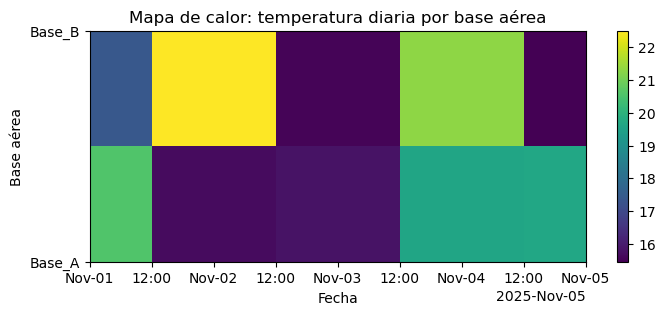

In [13]:
import matplotlib.pyplot as plt

# Transponemos para que "base" sea el eje Y y "time" sea el eje X
temps_transp = temps.transpose("base", "time")

# Graficamos como mapa de calor: cada celda es la temperatura de una base en un día
# Eliminamos 'aspect' y agregamos 'figsize' para controlar el tamaño del plot
temps_transp.plot(
    x="time",
    y="base",
    cmap="viridis",       # Escala de colores
    figsize=(8, 3)        # Opcional: tamaño del gráfico en pulgadas
)

plt.title("Mapa de calor: temperatura diaria por base aérea")
plt.xlabel("Fecha")
plt.ylabel("Base aérea")
plt.show()



<xarray.DataArray (time: 5, base: 2)> Size: 80B
array([[20.55448625, 17.35409412],
       [15.6563207 , 22.50887594],
       [15.79368897, 15.50834515],
       [19.60202928, 21.30431417],
       [19.64628285, 15.45054664]])
Coordinates:
  * time     (time) datetime64[ns] 40B 2025-11-01 2025-11-02 ... 2025-11-05
  * base     (base) <U6 48B 'Base_A' 'Base_B'
Dimensiones: ('time', 'base')
Tamaños de dimensiones: Frozen({'time': 5, 'base': 2})
Coordenadas: ['time', 'base']
Valores tipo numpy array:
 [[20.55448625 17.35409412]
 [15.6563207  22.50887594]
 [15.79368897 15.50834515]
 [19.60202928 21.30431417]
 [19.64628285 15.45054664]]
Atributos: {}
Nombre: None


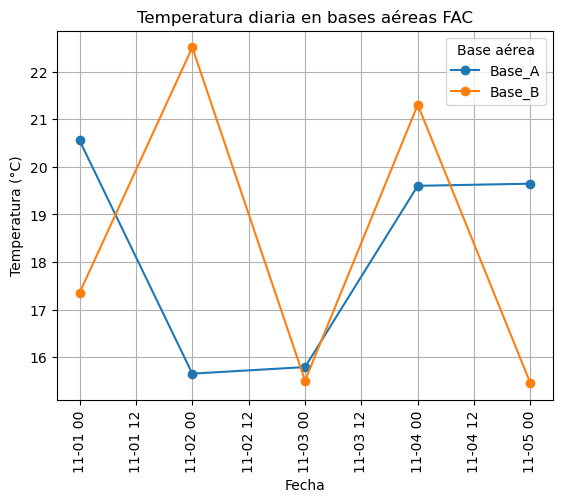

In [26]:
import matplotlib.pyplot as plt

# Imprime toda la estructura del DataArray (valores, dimensiones, coordenadas, etc.)
print(temps)

# Consulta los nombres de dimensiones y su orden
print("Dimensiones:", temps.dims)

# Consulta el tamaño de cada dimensión (mapeo de nombre a longitud)
print("Tamaños de dimensiones:", temps.sizes)

# Consulta la lista de coordenadas disponibles (como fechas o nombres de bases)
print("Coordenadas:", list(temps.coords))

# Accede a los valores numéricos como array de Numpy
print("Valores tipo numpy array:\n", temps.values)

# Consulta los atributos almacenados (metadatos), si existen
print("Atributos:", temps.attrs)

# Consulta el nombre de la variable (si lo tiene)
print("Nombre:", temps.name)


# Graficamos una línea para cada base aérea
for base in temps.base.values:
    # Selecciona la serie temporal completa de la base
    serie_base = temps.sel(base=base)
    # Dibuja una línea: eje X = fechas, eje Y = temperatura
    plt.plot(serie_base.time.values, serie_base.values, marker='o', label=base)

plt.title("Temperatura diaria en bases aéreas FAC")
plt.xlabel("Fecha")
plt.xticks(rotation=90)
plt.ylabel("Temperatura (°C)")
plt.legend(title="Base aérea")   # Añade leyenda para identificar cada base
plt.grid(True)                   # Añade cuadrícula para facilitar lectura
plt.show()


| Característica       | NumPy                             | Pandas                       | Xarray                                         |
| -------------------- | --------------------------------- | ---------------------------- | ---------------------------------------------- |
| Tipo de datos        | Arrays n-dimensionales homogéneos | Datos tabulares heterogéneos | Datos multidimensionales etiquetados           |
| Estructura           | Arrays                            | Series y DataFrames          | DataArrays y Datasets                          |
| Dimensiones          | N                                 | 1 y 2                        | N (nombres y etiquetas explícitas)             |
| Manejo temporal      | Limitado                          | Muy bueno                    | Excelente (dimensión tiempo explícita)         |
| Uso principal        | Cálculo numérico                  | Análisis/limpieza datos      | Análisis científicos multidimensionales        |
| Velocidad            | Muy alto                          | Alto (con sobrecarga)        | Depende (manejo avanzado con más flexibilidad) |
| Curva de aprendizaje | Baja                              | Baja/Media                   | Media/Alta                                     |
| Aplicaciones típicas | Cálculos, álgebra, simulaciones   | Tablas, series temporales    | Datos geoespaciales y atmosféricos             |